In [1]:
!pip install geopandas geopy pointpats fiona --quiet

In [4]:
import geopandas as gpd
import fiona as f 
import pointpats as PointPattern
import matplotlib.pyplot as plt

In [5]:
f.listlayers('../Data/Pratica2/cetesb.gpkg')

['pocos_abc', 'mun_abc', 'contaminadas_abc', 'cetesb']

In [6]:
pocos_abc = gpd.read_file('../Data/Pratica2/cetesb.gpkg', layer='pocos_abc')
mun_abc = gpd.read_file('../Data/Pratica2/cetesb.gpkg', layer='mun_abc')
cetesb = gpd.read_file('../Data/Pratica2/cetesb.gpkg', layer='cetesb')

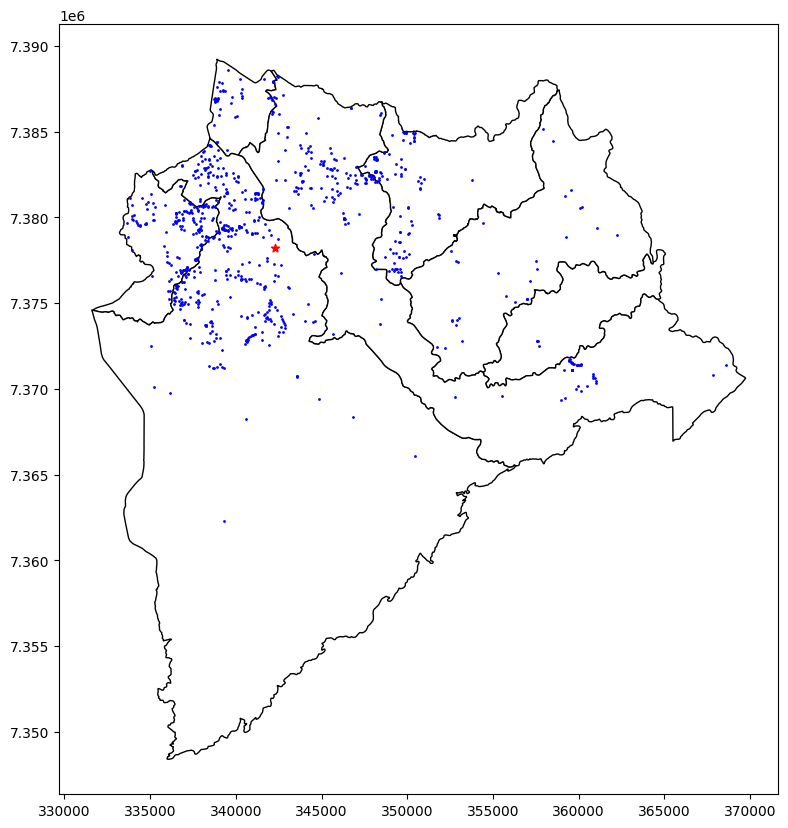

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
mun_abc.plot(ax=ax, color='white', edgecolor='black')
pocos_abc.plot(ax=ax, color='blue', markersize=1)
cetesb.plot(ax=ax, color='red', marker='*')
plt.show()

In [15]:
mun_abc.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [16]:
x = pocos_abc['geometry'].x
y = pocos_abc['geometry'].y

In [17]:
import numpy as np

In [18]:
pontos = np.vstack([x,y]).T

In [20]:
pp = PointPattern.PointPattern(pontos)

/home/bernardo/Documents/insper8thSem/GeoRef/geopy/lib/python3.10/site-packages/libpysal/cg/shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/home/bernardo/Documents/insper8thSem/GeoRef/geopy/lib/python3.10/site-packages/libpysal/cg/shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


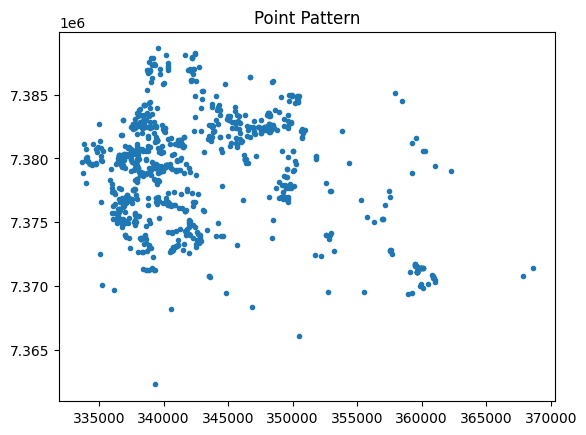

In [21]:
pp.plot()

# Centro Médio

In [23]:
from pointpats.centrography import mean_center, std_distance, ellipse

In [24]:
mc = mean_center(pp.points)

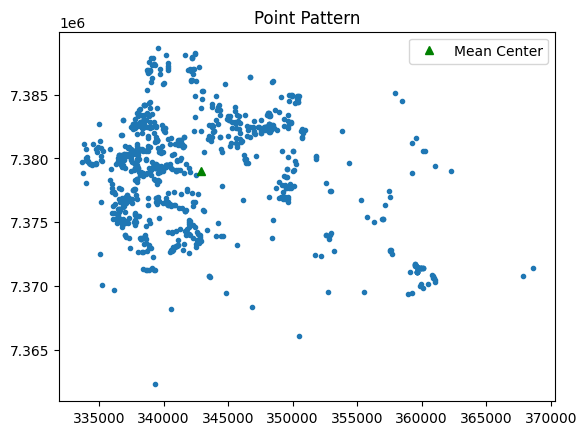

In [26]:
pp.plot()
plt.plot(mc[0], mc[1], 'g^', label='Mean Center')
plt.legend()

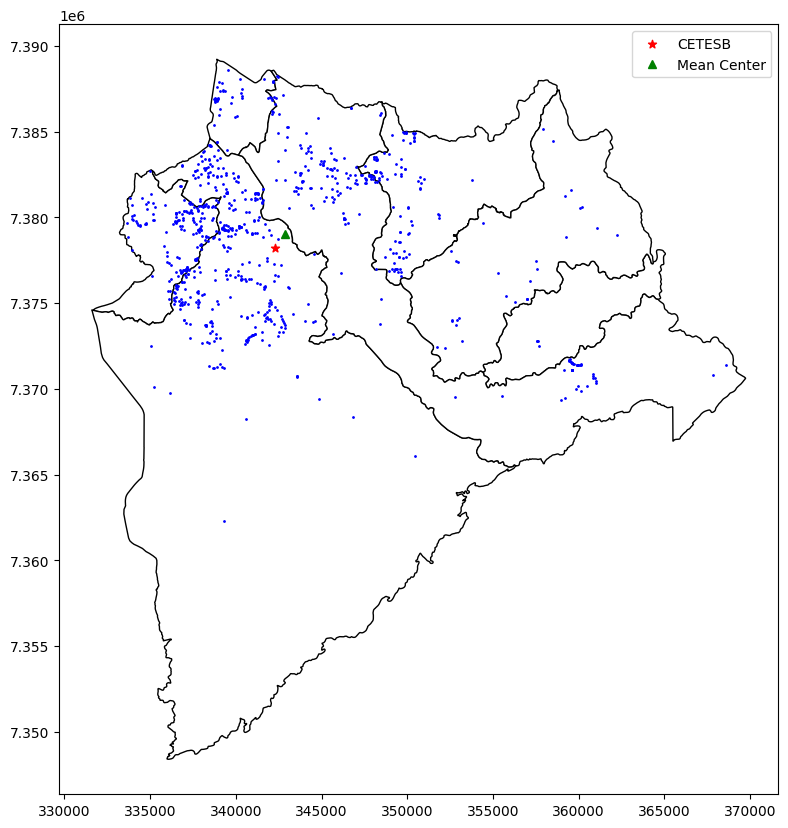

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
mun_abc.plot(ax=ax, color='white', edgecolor='black')
pocos_abc.plot(ax=ax, color='blue', markersize=1)
cetesb.plot(ax=ax, color='red', marker='*', label = 'CETESB')
plt.plot(mc[0], mc[1], 'g^', label='Mean Center')
plt.legend()
plt.show()

In [30]:
stdd = std_distance(pp.points)

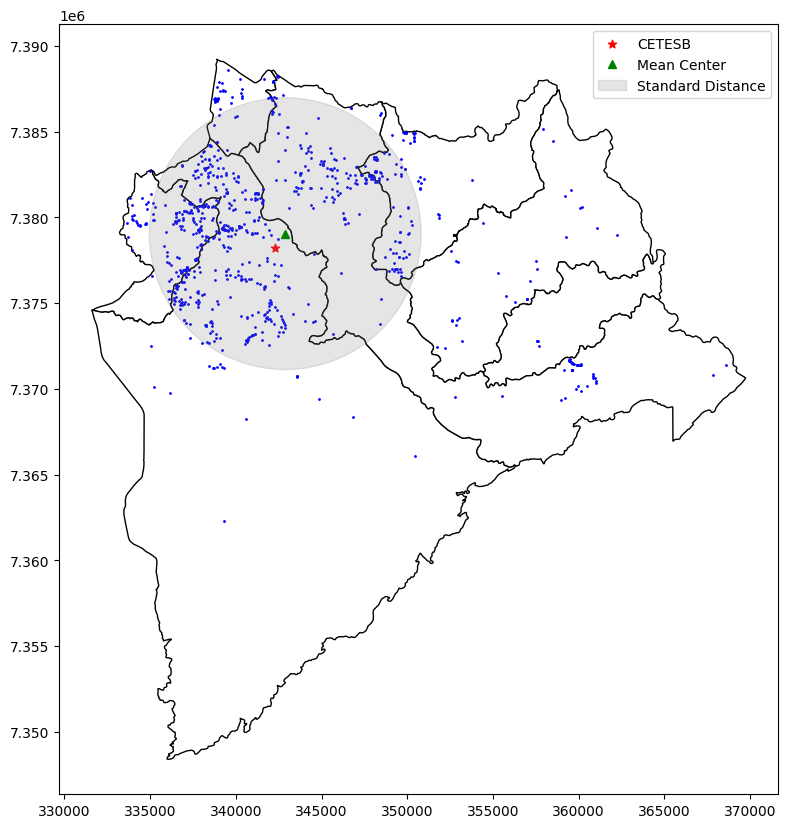

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
mun_abc.plot(ax=ax, color='white', edgecolor='black')
pocos_abc.plot(ax=ax, color='blue', markersize=1)
cetesb.plot(ax=ax, color='red', marker='*', label = 'CETESB')
plt.plot(mc[0], mc[1], 'g^', label='Mean Center')
circle = plt.Circle(mc, stdd, color='gray', alpha=0.2, label='Standard Distance')
ax.add_artist(circle)
plt.legend()
plt.show()

# Fronteiras

In [33]:
from pointpats import hull 

In [36]:
convex_hull_vertices = hull(pontos)

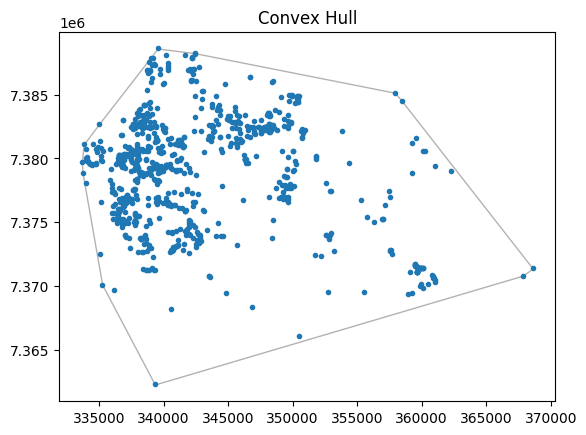

In [38]:
pp.plot(title='Convex Hull', hull=True)

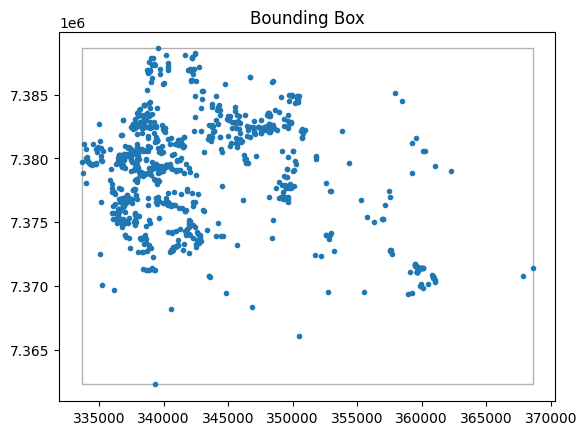

In [ ]:
pp.plot(title='Bounding Box', window=True)

# Quadrats

In [40]:
import pointpats.quadrat_statistics as qs

In [43]:
q_r = qs.QStatistic(pp, shape='rectangle', nx=3, ny=3)

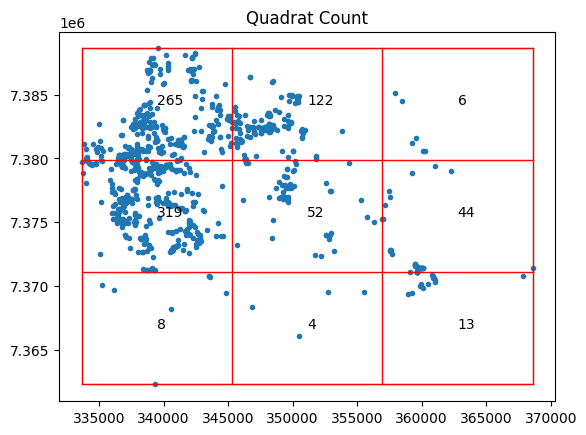

In [44]:
q_r.plot()

# Kernel

In [45]:
!pip install seaborn --quiet

In [51]:
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

[]

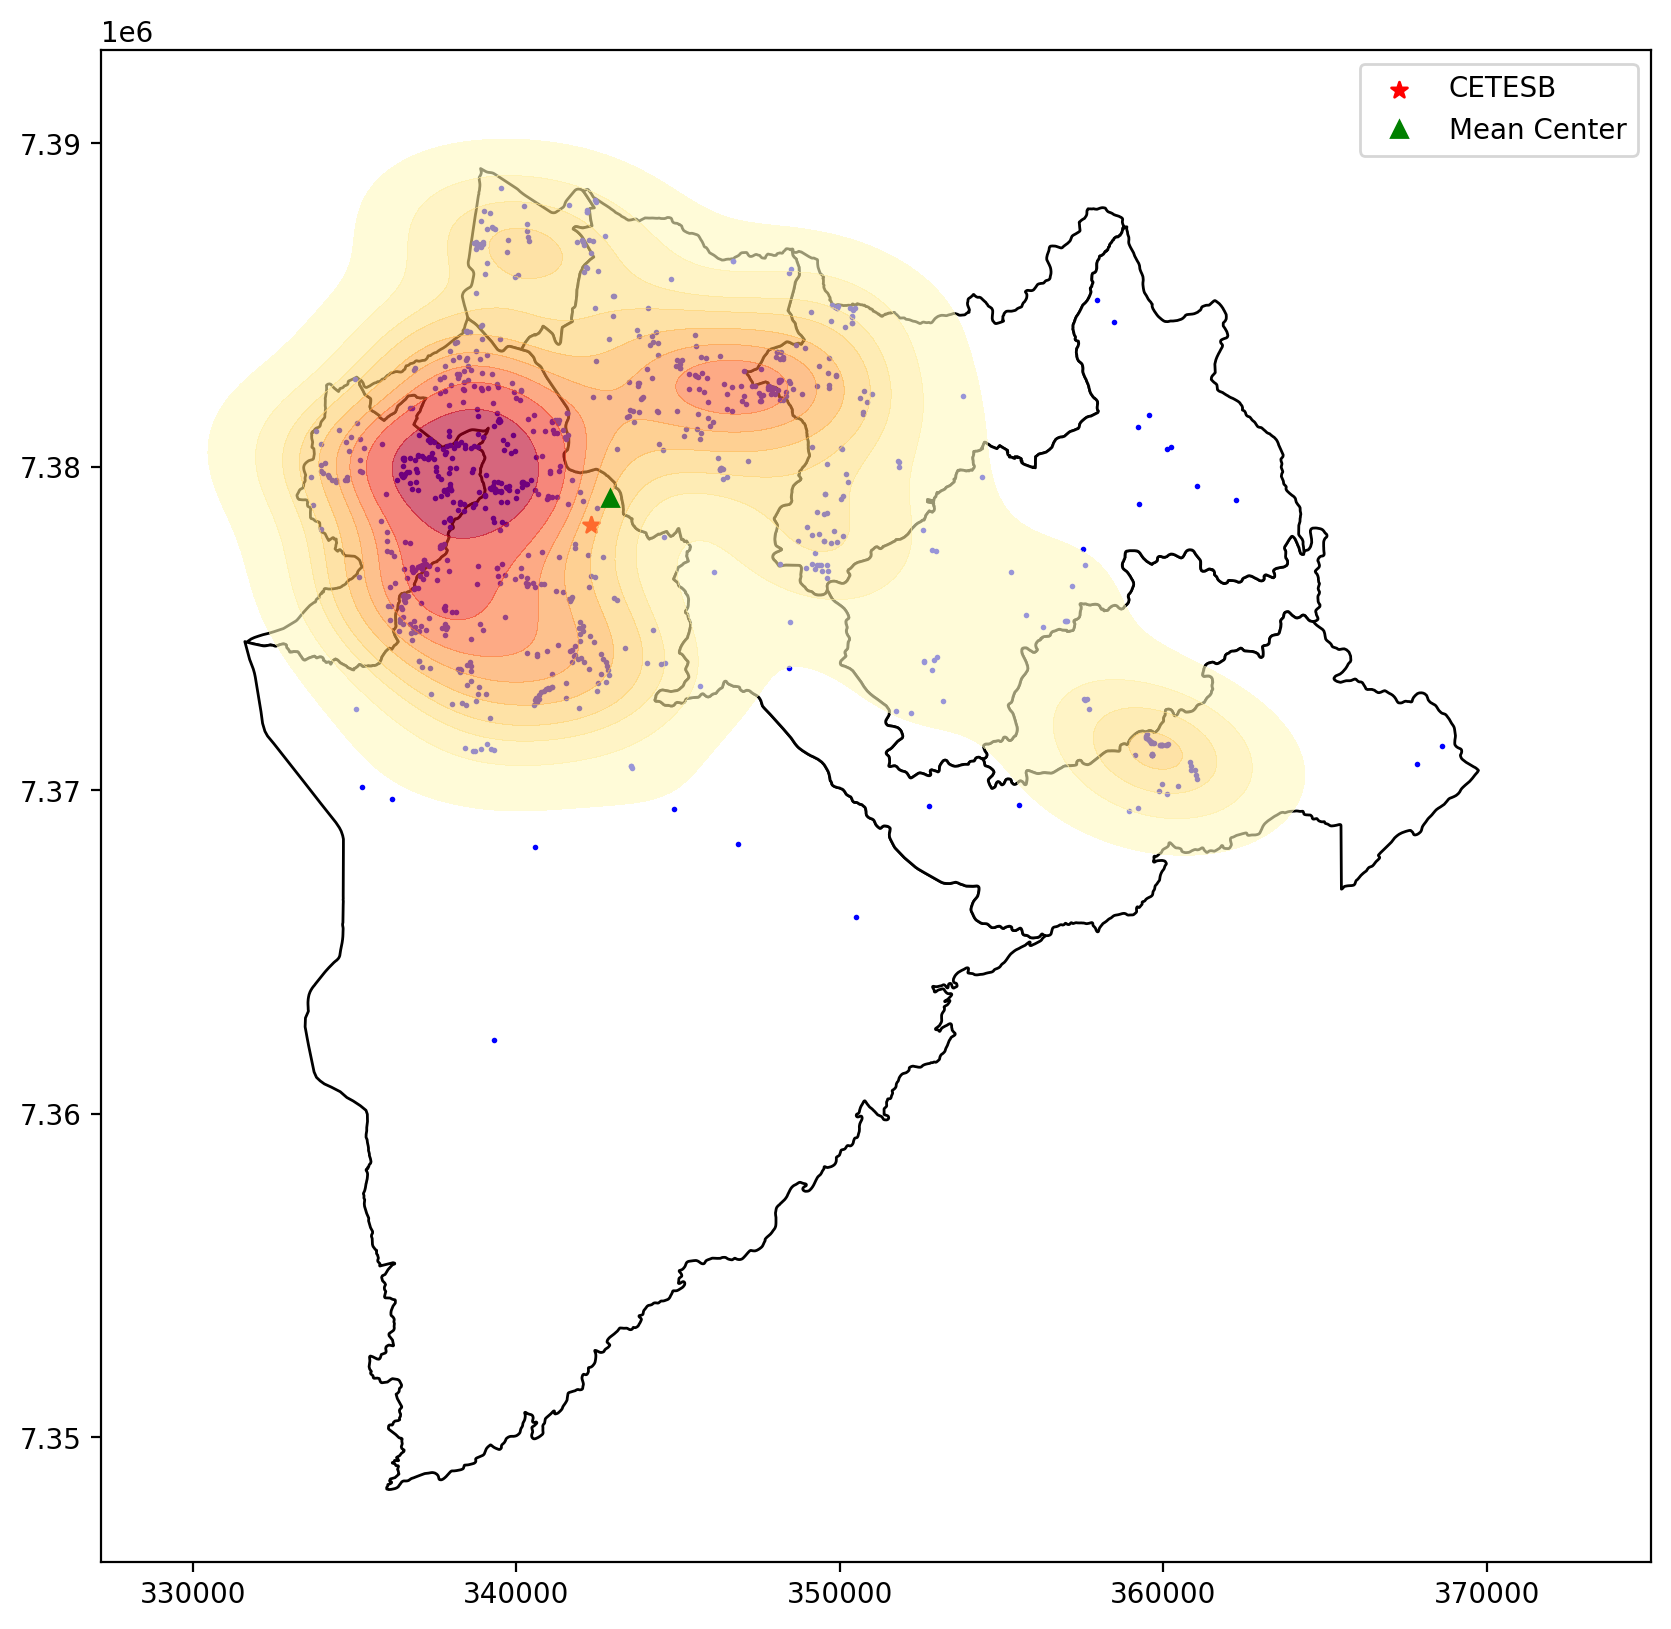

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
mun_abc.plot(ax=ax, color='white', edgecolor='black')
pocos_abc.plot(ax=ax, color='blue', markersize=1)
cetesb.plot(ax=ax, color='red', marker='*', label = 'CETESB')
plt.plot(mc[0], mc[1], 'g^', label='Mean Center')
sns.kdeplot(x=pontos[:,0], y=pontos[:,1], fill=True, cmap='YlOrRd', ax=ax, alpha=0.6)
plt.legend()
plt.plot()

# KNN

In [53]:
pp.knn()

(array([[ 45],
        [133],
        [ 83],
        [ 65],
        [100],
        [  4],
        [102],
        [ 18],
        [109],
        [119],
        [ 96],
        [ 12],
        [ 11],
        [133],
        [ 13],
        [139],
        [ 48],
        [ 58],
        [  7],
        [ 71],
        [137],
        [143],
        [ 78],
        [ 43],
        [ 70],
        [ 29],
        [ 27],
        [ 94],
        [132],
        [ 25],
        [ 33],
        [138],
        [ 99],
        [ 36],
        [109],
        [ 38],
        [142],
        [ 38],
        [ 35],
        [ 40],
        [ 39],
        [ 46],
        [ 40],
        [ 97],
        [ 97],
        [  0],
        [ 41],
        [ 49],
        [134],
        [ 47],
        [ 77],
        [ 52],
        [ 51],
        [ 59],
        [ 86],
        [ 58],
        [ 17],
        [  1],
        [ 17],
        [ 61],
        [113],
        [ 59],
        [135],
        [ 96],
        [ 66],
        [  3],
        [ 

In [54]:
pp.max_nnd

6084.4172261035055

In [55]:
pp.mean_nnd

220.26253345860334

In [58]:
area = pp.window.area
perimetro = pp.window.perimeter
n = len(pocos_abc)
expected = 0.5*np.sqrt(area/n) + (0.0514 + 0.041/np.sqrt(n))*(perimetro/n)

In [59]:
expected

533.3693900713264

In [60]:
NNI = pp.mean_nnd/expected

In [61]:
NNI

0.41296433120983583

# Função K Ripley

In [63]:
from pointpats.distance_statistics import K 
from pointpats import PoissonPointProcess

In [64]:
kp = K(pp)

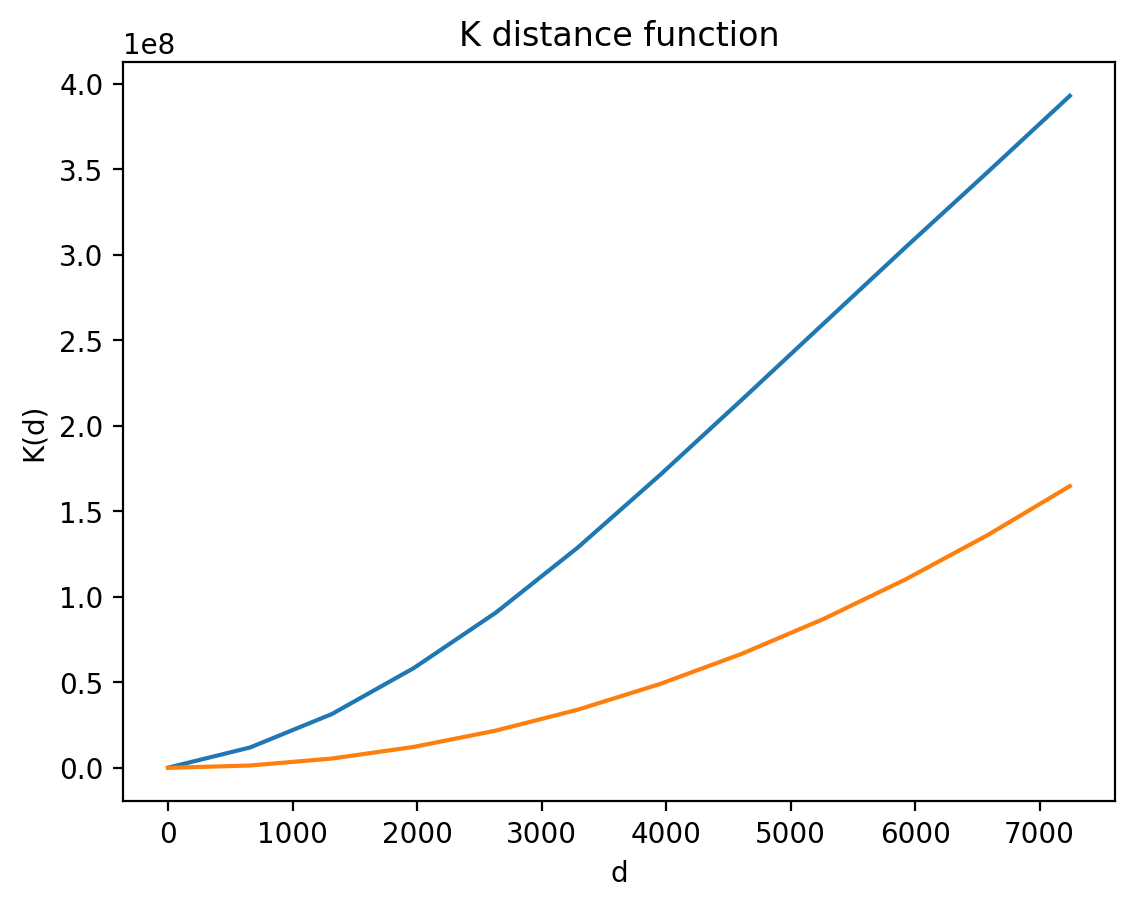

In [69]:
kp.plot()

# Envelopes

In [66]:
sim = PoissonPointProcess(pp.window, pp.n, 100, asPP=True)

/home/bernardo/Documents/insper8thSem/GeoRef/geopy/lib/python3.10/site-packages/libpysal/cg/shapes.py:103: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


In [72]:
# instalar versão com numpy com np.int

In [67]:
from pointpats.distance_statistics import Kenv

In [71]:
kenv = Kenv(pp, intervals=20, realizations=sim)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
kenv.plot()